# Chick Weight and Diet

This study determines which diet results in the largest weight gain in chicks. 
 Diet1 is the normal diet and the other three diets are alternatives.
 We use non-parametric methods to determine:
- Which of the diets resulted in statistically  most significant weight gain compared to Diet1
- Provide a confidence interval for an estimate of the real weight gain
- Determine if a quadratic regression model is significantly more accurate than using a simple linear regression.

## 2.2.1 Data preparation

5 of the chicks do not have measurements for the final day, day 21 so were removed from the analysis.

In [2]:
import pandas as pd
chickweight = pd.read_csv('chick_weight.csv')
chickweight = chickweight.drop(['Unnamed: 0'], axis=1)
chickweight.head()

,weight,Time,Chick,Diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [18]:
chickweight.shape

(578, 4)

In [15]:
# Every chick is already assigned to a diet.
# We will simply identify which chicks are missing a value for day 21
# And then remove those chicks from the original dataframe.
chick_wide = chickweight.pivot(index='Chick', columns='Time', values='weight')
chick_wide.shape

(50, 12)

In [16]:
chick_wide_nona = chick_wide.dropna()
chick_wide_nona.shape

(45, 12)

In [17]:
chick_wide_nona.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 17, 19, 20, 21,
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
            39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50],
           dtype='int64', name='Chick')

In [20]:
chickweight = chickweight[chickweight['Chick'].isin(chick_wide_nona.index)]
chickweight.shape

(540, 4)

## 2.3.1 WEIGHT CHANGE SIGNIFICANCE

Get final weights

In [21]:
# For all the diets, obtain the final weights.
# We could have simply selected day 21, however this function allows
# to obtain final weights even if the chick does not have a measurement
# for day 21.
def get_final_weights_for_diet(diet):
    df_this_diet = chickweight[chickweight['Diet']==diet]
    final_weights = []
    chicks = list(df_this_diet.Chick.unique())
    for chick_num in chicks:
        temp_df = df_this_diet[df_this_diet['Chick']==chick_num]
        final_weight = list(temp_df['weight'])[-1]
        final_weights.append(final_weight)
    return final_weights

all_final_weights = {}
for i in range(1,5):
    all_final_weights[i] = get_final_weights_for_diet(i)

The shuffle function

In [32]:
# This shuffle function takes an number of groups.
import random
def shuffle(grps):
    num_grps = len(grps)
    pool = []

    # pool all values
    for i in range(num_grps):
        pool.extend(grps[i])
    # mix them up
    random.shuffle(pool)
    # reassign to groups of same size as original groups
    new_grps = []
    start_index = 0
    end_index = 0
    for i in range(num_grps):
        end_index = start_index + len(grps[i])
        new_grps.append(pool[start_index:end_index])
        start_index = end_index
    return new_grps

In [24]:
# A quick function to return the difference of the average of two groups
def meandiff(grpA, grpB):
    return sum(grpB) / float(len(grpB)) - sum(grpA) / float(len(grpA))

In [30]:
# this function draws a histogram.
# diet_1 and diet_2 are the two diets being compared.
# It is used simply for the title
# the observed value defines where to draw the vertical line
# d is a set of values.
import numpy as np
import matplotlib.pyplot as plt
def draw_hist(d, observed, diet_1, diet_2):
    hist,bin_edges = np.histogram(d, bins=5000)    
    plt.figure(figsize=[8,8])
    plt.bar(bin_edges[:-1], hist, width = 1, color='#0504aa',alpha=0.7)
    plt.xlim(-125, 125)
    plt.ylim(0,35)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Difference',fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.title('Distribution of Difference Diet ' + str(diet_2) + ' - Diet ' + str(diet_1),fontsize=15)
    plt.axvline(x=observed, color='r', linestyle='dashed', linewidth=2)
    plt.show()

In [26]:
# This is the main function 
# - first we calculate the observed mean of differnece
# - Then 10,000 times, we shuffle the samples
# - calculate the difference of the means of the shuffled samples
#   and compare them to the difference of the means observed
#
# This is a one-tailed test, so we are only looking for an increase
#   or positive change when comparing weights of diet2-4 compared to 
#   normal diet 1

def diff2meansig(diet_1, diet_2, grpA, grpB):

    # list of lists
    samples = [grpA, grpB]
    a = 0
    b = 1

    observed_mean_diff = meandiff(samples[a], samples[b])
    all_mean_diffs = []

    count = 0
    num_shuffles = 10000

    for i in range(num_shuffles):
        new_samples = shuffle(samples)
        mean_diff = meandiff(new_samples[a], new_samples[b])
        all_mean_diffs.append(mean_diff)
        if mean_diff >= observed_mean_diff:
            count = count + 1
    
    draw_hist(all_mean_diffs, observed_mean_diff, diet_1, diet_2)

    ######################################
    #
    # Output
    #
    ######################################
    
    print("**********Diet: ", diet_1, " vs Diet: ", diet_2,"**********")

    print ("Observed difference of two means: %.2f" % observed_mean_diff)
    print (count, "out of", num_shuffles, "experiments had a difference of two means ", end="")
    print ("greater than or equal to", end=" ")
    print ("%.2f" % observed_mean_diff, ".")
    print ("The chance of getting a difference of two means", end=" ")
    print ("greater than or equal to ", end="")
    print ("%.2f" % observed_mean_diff, "is", (count / float(num_shuffles)), ".")

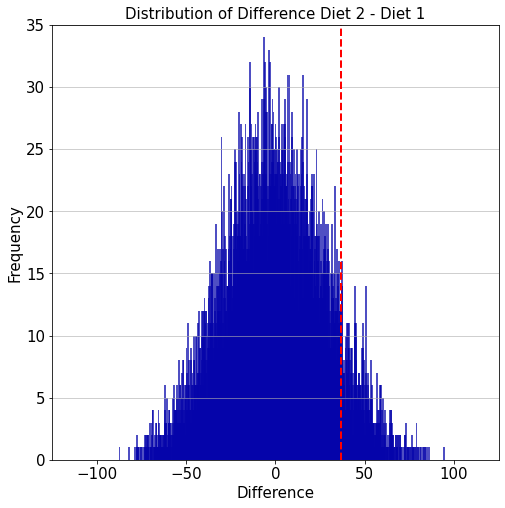

**********Diet:  1  vs Diet:  2 **********
Observed difference of two means: 36.95
887 out of 10000 experiments had a difference of two means greater than or equal to 36.95 .
The chance of getting a difference of two means greater than or equal to 36.95 is 0.0887 .


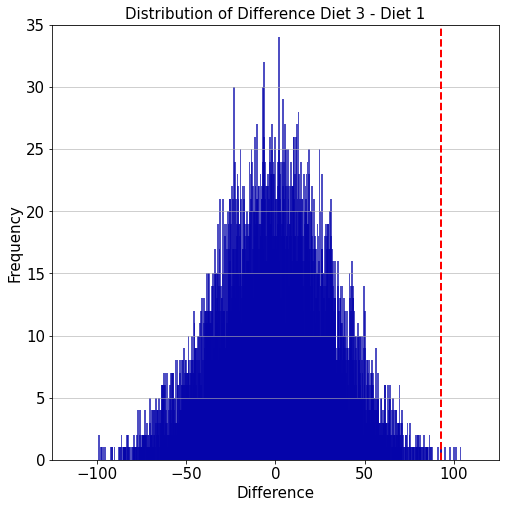

**********Diet:  1  vs Diet:  3 **********
Observed difference of two means: 92.55
7 out of 10000 experiments had a difference of two means greater than or equal to 92.55 .
The chance of getting a difference of two means greater than or equal to 92.55 is 0.0007 .


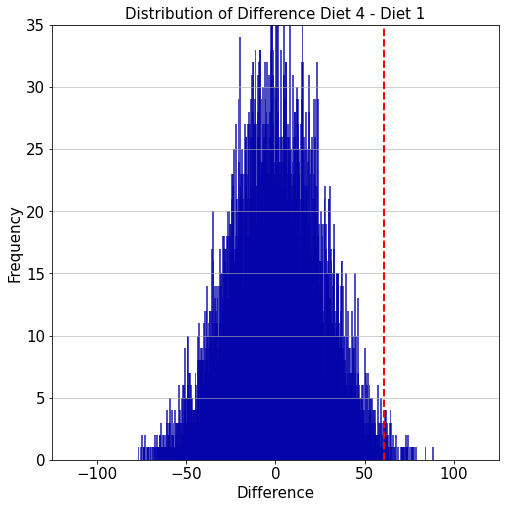

**********Diet:  1  vs Diet:  4 **********
Observed difference of two means: 60.81
74 out of 10000 experiments had a difference of two means greater than or equal to 60.81 .
The chance of getting a difference of two means greater than or equal to 60.81 is 0.0074 .


In [36]:
random.seed(123) # this step is not necessary. 
                 # it simply allows us to repeat the same results as the book.
combinations = [[1,2], [1,3], [1,4]]
for combination in combinations:
    diet_1, diet_2 = combination
    diff2meansig(diet_1, diet_2, all_final_weights[diet_1], all_final_weights[diet_2])

## 2.3.2 WEIGHT CHANGE CONFIDENCE INTERVAL

In [37]:
# The bootstrap function will allow us to randomly select
# the values with replacement ( can be selected more than once)
def bootstrap(x):
    samp_x = []
    for i in range(len(x)):
        samp_x.append(random.choice(x))
    return samp_x

In [40]:
# This is the main function for confidence interval.
# It is similar to the one for shuffle test,
# except, instead of shuffling the values, 
# we are bootstrapping the values from within the individual groups
# and calculating the difference between the means.
# Then we sort the differences and take the 5th and 95th highest
# value for a 90% confidence interval
import math

def diff2meanconf(diet_1, diet_2, grpA, grpB, conf_interval):
    # list of lists
    samples = [grpA, grpB] 
    a = 0
    b = 1

    observed_mean_diff = meandiff(samples[a], samples[b])

    num_resamples = 10000   # number of times we will resample from our original samples
    out = []                # will store results of each time we resample

    for i in range(num_resamples):
        # get bootstrap samples for each of our groups
        # then compute our statistic of interest
        # append statistic to out
        bootstrap_samples = []  # list of lists
        for sample in samples:
            bootstrap_samples.append(bootstrap(sample))
        # now we have a list of bootstrap samples, run meandiff
        out.append(meandiff(bootstrap_samples[a], bootstrap_samples[b]))

    out.sort()

    tails = (1 - conf_interval) / 2

    # in case our lower and upper bounds are not integers,
    # we decrease the range (the values we include in our interval),
    # so that we can keep the same level of confidence
    lower_bound = int(math.ceil(num_resamples * tails))
    upper_bound = int(math.floor(num_resamples * (1 - tails)))

    ######################################
    #
    # Output
    #
    ######################################

    # print observed value and then confidence interval
    print("**********Diet: ", diet_1, " vs Diet: ", diet_2,"**********")
    print ("Observed difference between the means: %.2f" % observed_mean_diff)
    print ("We have", conf_interval * 100, "% confidence that the true difference between the means", end=" ")
    print ("is between: %.2f" % out[lower_bound], "and %.2f" % out[upper_bound])

In [41]:
random.seed(123)
for combination in combinations:
    diet_1, diet_2 = combination
    diff2meanconf(diet_1, diet_2, all_final_weights[diet_1], all_final_weights[diet_2], conf_interval = 0.9)

**********Diet:  1  vs Diet:  2 **********
Observed difference between the means: 36.95
We have 90.0 % confidence that the true difference between the means is between: -7.99 and 81.26
**********Diet:  1  vs Diet:  3 **********
Observed difference between the means: 92.55
We have 90.0 % confidence that the true difference between the means is between: 50.29 and 134.71
**********Diet:  1  vs Diet:  4 **********
Observed difference between the means: 60.81
We have 90.0 % confidence that the true difference between the means is between: 29.05 and 93.35


## 2.4 Regression Analysis

In [42]:
# given x and y coordinates and the degree of line to fit, 
# the function will return the coefficients of the line
def get_slope_and_intercept(X, Y, deg=1):
    z = np.polyfit(X, Y, deg)
    return z

In [43]:
# using the coefficients of the line provided in z
# and for each x and y value it will calculate the y_hat
# for the given x and square the difference between y and y_hat.

def getSS(X,Y,z):
    # using the z values, calculate the y_hat for each values
    # then calculate RMSE, sqrt ( Sum (y_hat - y)**2 / n )
    all_diffs=np.array([])
    for i in range(len(X)):
        if len(z)==2:
            y_hat = X[i]*z[0] + z[1]
        if len(z)==3:
            y_hat = X[i]*X[i]*z[0]+X[i]*z[1]+z[2]
        all_diffs=np.append(all_diffs,[(y_hat - Y[i])**2])
    diff_sum = sum(all_diffs)
    
    return diff_sum

In [44]:
# the rmse is simply the square root of the average sum of squares
def getRMSE(ss):
    diff_sum = sum(ss)/len(ss)
    return np.sqrt(diff_sum)

First we will calculate the sum of squares for all diets
using linear and quadratic models to fit the points.
We are storing the sum of squares before calculating the rmse
so we can use it for the next step.

In [45]:
uniqueDiets = chickweight.Diet.unique()
weight = 0
time = 1
ss_linear_dict = {}
ss_quadratic_dict={}
for diet in uniqueDiets:
        #print("======= Diet: ", diet,"=======")
        df_this_diet = chickweight[:][chickweight.Diet == diet]
        df_this_diet_values = df_this_diet.values
        # for each diet calculate the regression line
        X = np.array(df_this_diet_values[:,time], dtype=float)
        Y = np.array(df_this_diet_values[:,weight], dtype=float) 
        z = get_slope_and_intercept(X, Y, 1)
        
        # for each point in the diet, calculate the RMSE and add it to rmse
        # dictionary for a given diet.      
        ss_linear_dict[diet] = [getSS([x], [y],z) for x, y in zip(df_this_diet['Time'], df_this_diet['weight'])]
        
        
for diet in uniqueDiets:
        #print("======= Diet: ", diet,"=======")
        df_this_diet = chickweight[:][chickweight.Diet == diet]
        df_this_diet_values = df_this_diet.values
        X = np.array(df_this_diet_values[:,time], dtype=float)
        Y = np.array(df_this_diet_values[:,weight], dtype=float) 
        z = get_slope_and_intercept(X, Y, 2)
        ss_quadratic_dict[diet] = [getSS([x], [y],z) for x, y in zip(df_this_diet['Time'], df_this_diet['weight'])]
        

In [47]:
# Now we calculate the rmse
# and the differnence between the rmse of linear vs quadratic fit
# Note that quadratic is often more fit than linear so we will
# subtract linear from quadratic.
obs_rmse_diff={}
for diet in uniqueDiets:
        print("======= Diet: ", diet,"=======")
        print("======= quadratic =", getRMSE(ss_quadratic_dict[diet]))
        print("======= linear =", getRMSE(ss_linear_dict[diet]))
        obs_rmse_diff[diet]=getRMSE(ss_linear_dict[diet])-getRMSE(ss_quadratic_dict[diet])
        print("======= difference =" ,obs_rmse_diff[diet])

======= Diet:  1 =======
======= quadratic = 33.48244589167236
======= linear = 33.62477126174899
======= difference = 0.1423253700766267
======= Diet:  2 =======
======= quadratic = 40.693822046595365
======= linear = 41.01465254503944
======= difference = 0.3208304984440744
======= Diet:  3 =======
======= quadratic = 36.07063908131038
======= linear = 37.90346490949627
======= difference = 1.8328258281858893
======= Diet:  4 =======
======= quadratic = 20.16799044508028
======= linear = 20.38934577556469
======= difference = 0.22135533048440692


In [48]:
# given two values, return them either in the same order
# or swapped.
def randomswap(x,y):
    # x and y are two numbers
    rchoice = random.choice([0,1])
    if rchoice == 0:
        return [x,y]
    else:
        return [y,x]


In [52]:
# For every diet,
#   repeatedly, 10,000 times, 
#     for each point in the model
#       swap the sum of squares from linear and quadratic models.
#     calculate the diff of rmse between the quadratic and linear models

random.seed(123)
rmse_diff_dict={1:[], 2:[], 3:[], 4:[]}
rmse_linear_dict={1:[], 2:[], 3:[], 4:[]}
rmse_quad_dict={1:[], 2:[], 3:[], 4:[]}

for diet in uniqueDiets:
    print("======= Diet: ", diet,"=======")
    for j in range(10000):
        temp_quadratic=[]
        temp_linear=[]
        for i in range(len(ss_quadratic_dict[diet])):
            temp_q, temp_l = randomswap(ss_quadratic_dict[diet][i],ss_linear_dict[diet][i])
            temp_quadratic.append(temp_q)
            temp_linear.append(temp_l)
        temp_linear_rmse = getRMSE(temp_linear)
        temp_quad_rmse = getRMSE(temp_quadratic)
        rmse_linear_dict[diet].append(temp_linear_rmse)
        rmse_quad_dict[diet].append(temp_quad_rmse)
        rmse_diff = temp_linear_rmse - temp_quad_rmse
        rmse_diff_dict[diet].append(rmse_diff)

======= Diet:  1 =======
======= Diet:  2 =======
======= Diet:  3 =======
======= Diet:  4 =======


In [53]:
# compare observed values to the swapped ones above
# and provide the 90% confidence intervals

for diet in uniqueDiets:
        print("======= Diet: ", diet,"=======")
        sorted_rmse = rmse_diff_dict[diet]
        sorted_rmse.sort()
        count = sum([r >= obs_rmse_diff[diet] for r in sorted_rmse])
        print("p-value ", str(count/10000))
        #sorted_rmse.sort()
        print("lwr ", str(sorted_rmse[500]))
        print("upr ", str(sorted_rmse[9500]))


======= Diet:  1 =======
p-value  0.2734
lwr  -0.3726690712336094
upr  0.378109805593958
======= Diet:  2 =======
p-value  0.2578
lwr  -0.8055943101417782
upr  0.7956830142914555
======= Diet:  3 =======
p-value  0.0522
lwr  -1.8280945218771478
upr  1.8569605585677635
======= Diet:  4 =======
p-value  0.2566
lwr  -0.5273887567572402
upr  0.5354587480335091
